<a href="https://colab.research.google.com/github/Sereniiti/models-exploration/blob/develop/Ayman/02_Sereniiti_text_Classification_6_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import regular expression library for searching words in a text or paragraph
import re

# function to clean the given text lowring, removing special characters
def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["] replacing by space ""
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import numpy as np
import pandas as pd # for data frame
import re # regular expression library for searching words in a text or paragraph
from sklearn.feature_extraction.text import TfidfVectorizer #to convert the words to feature  vectors
from sklearn.model_selection import train_test_split # to split our dtata set into training data and test data
from sklearn.linear_model import LogisticRegression # 
from sklearn.metrics import accuracy_score #


In [4]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data_sentences = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_sentences.csv')
# Dataset is now stored in a Pandas Dataframe

In [9]:
# show first 5 records
data_sentences.head(5)

,words_en,words_Fr,ratings
0,I am being abused.,Je suis maltraité.,acceptable negative
1,I am unwanted.,Je suis indésirable.,acceptable negative
2,I don't feel heard,Je ne me sens pas entendu,acceptable negative
3,I don't feel supported,Je ne me sens pas soutenue,acceptable negative
4,I don't like you,Je ne t'aime pas,acceptable negative


In [10]:
data_sentences.shape

(7482, 3)

In [11]:
#check missing values
data_sentences.isnull().sum()

words_en    0
words_Fr    0
ratings     0
dtype: int64

In [12]:
#check the unique records in ratings column to map them with code number
data_sentences['ratings'].unique()

array(['acceptable negative', 'acceptable positive', 'bad', 'violent',
       'very violent', 'good', 'excellent'], dtype=object)

In [13]:
# map the ratings to code where 0 'very violent' until 6 'excellent'
data_sentences['ratings_code']=data_sentences['ratings'].map({'very violent':0,'violent':1,'bad':2,'acceptable negative':3,'acceptable positive':4,'good':5,'excellent':6})

In [14]:
data_sentences.head()

,words_en,words_Fr,ratings,ratings_code
0,I am being abused.,Je suis maltraité.,acceptable negative,3
1,I am unwanted.,Je suis indésirable.,acceptable negative,3
2,I don't feel heard,Je ne me sens pas entendu,acceptable negative,3
3,I don't feel supported,Je ne me sens pas soutenue,acceptable negative,3
4,I don't like you,Je ne t'aime pas,acceptable negative,3


In [16]:
# show data frame information to check the column data types
data_sentences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482 entries, 0 to 7481
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   words_en      7482 non-null   object
 1   words_Fr      7482 non-null   object
 2   ratings       7482 non-null   object
 3   ratings_code  7482 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 233.9+ KB


In [17]:
# count the ocurance of each rating
data_sentences['ratings_code'].value_counts()

5    2954
2    1526
1    1094
6     952
0     806
4      93
3      57
Name: ratings_code, dtype: int64

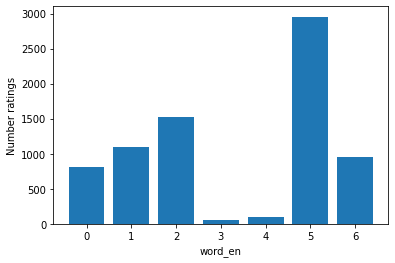

In [18]:
# this step to visualize the occurance of each we can skip
import matplotlib.pyplot as plt
Sentiment_count=data_sentences.groupby('ratings_code').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['words_en'])
plt.xlabel('word_en')
plt.ylabel('Number ratings')
plt.show()

In [20]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


# Transform each text into a vector of word counts
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 2))

X = vectorizer.fit_transform(data_sentences['words_en'])    




In [21]:
# adding training and testing set
model = LinearSVC()
Y = data_sentences['ratings_code'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2) # 0.2 means test data is %20 of the trained data will stored in the X_test
model.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [22]:
#Accuracy score of the training set
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)
print(' Accuracy score of the training:',training_data_accuracy )

 Accuracy score of the training: 0.9560568086883876


In [23]:
#Accuracy score of the test set
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)
print(' Accuracy score of the test:',test_data_accuracy )

 Accuracy score of the test: 0.6199064796259185


In [24]:
#input the data
X_new = [input('please input your text to test : ')]
# save the input data in a new data frame
X_new_data=pd.DataFrame({0:X_new})
#vectorize the inputs
X_new_in = vectorizer.transform(X_new_data[0])  
#predict the vectorized inputs
prediction=model.predict(X_new_in)
print(prediction)

#'very violent':0,'violent':1,'bad':2,'acceptable negative':3,'acceptable positive':4,'good':5,'excellent':6
if (prediction[0]==0):
    print('very violent')
elif (prediction[0]==1):
    print('violent')
elif (prediction[0]==2):
    print('bad')
elif (prediction[0]==3):
    print('acceptable negative')    
elif (prediction[0]==4):
    print('acceptable positive')    
elif (prediction[0]==5):
    print('good')
elif (prediction[0]==6):
    print('excellent')
else:
    print('unable to predict')

please input your text to test : this is to bad
[0]
very violent
